In [104]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from fbprophet import Prophet

def make_prophet_prediction(ts_train, prediction_period, withTransform=False):
    if withTransform == True:
        ts_train["y"] = np.log(ts_train["y"])
        
    model_prophet = Prophet()
    model_prophet.fit(ts_train)
    ts_predict = model_prophet.predict(model_prophet.make_future_dataframe(periods=prediction_period))
    
    if withTransform == True:
        ts_predict["yhat"] = np.exp(ts_predict["yhat"])
        ts_predict["yhat_upper"] = np.exp(ts_predict["yhat_upper"])
        ts_predict["yhat_lower"] = np.exp(ts_predict["yhat_lower"])
  
    ts_predict.loc[ts_predict["yhat"] < 0, "yhat"] = 0
    ts_predict.loc[ts_predict["yhat_upper"] < 0, "yhat_upper"] = 0
    ts_predict.loc[ts_predict["yhat_lower"] < 0, "yhat_lower"] = 0
    
    return (model_prophet, ts_predict)


def invboxcox(y, lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))
    
def get_main_metrics(ts_test, ts_predict, start_date, end_date,  col_test, col_predict):
    ts_mae = abs(ts_test[start_date:end_date][col_test] - ts_predict[start_date:end_date][col_predict])
    ts_mape = abs(ts_mae / ts_test[start_date:end_date][col_test])

    print("MAE = {}".format(ts_mae.mean()))

    print("MAPE = {}".format(ts_mape.mean()))
    
    print("Sum of data for the testing period: %s " % str(ts_test[start_date:end_date][col_test].sum()))
    print("Sum of predicted data for the testing period: %s " % str(ts_predict[start_date:end_date][col_predict].sum()))

c:\python36-32\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


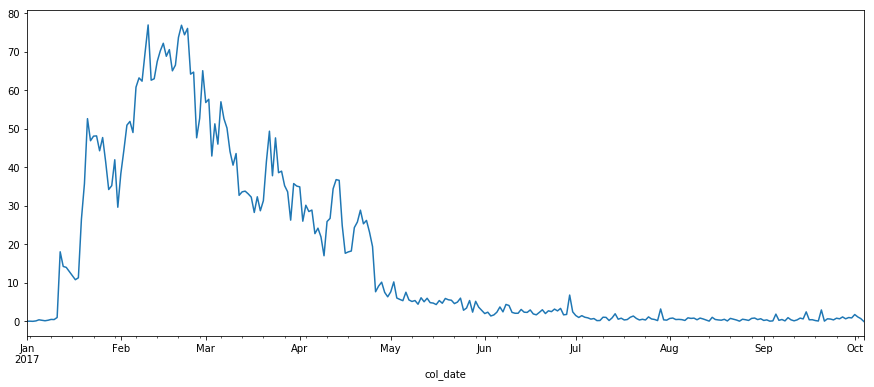

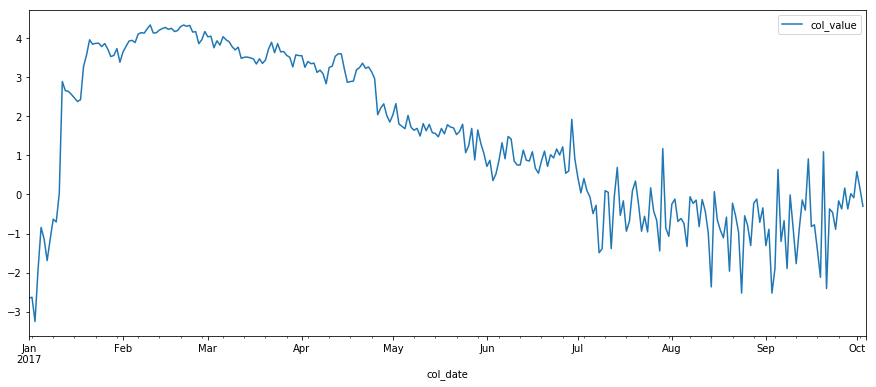

In [118]:
import pandas as pd

def parser(x):
    return pd.datetime.strptime(x[:10], '%Y-%m-%d')

ts = pd.read_csv("ts_revenue.csv", header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
ts.plot()
ts_log = ts.to_frame()

ts_log["col_value"]= np.log(ts_log["col_value"])
ts_log.plot()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE = 0.5617176666666666
MAPE = 1.0
Sum of data for the testing period: 16.85153 
Sum of predicted data for the testing period: 0.0 


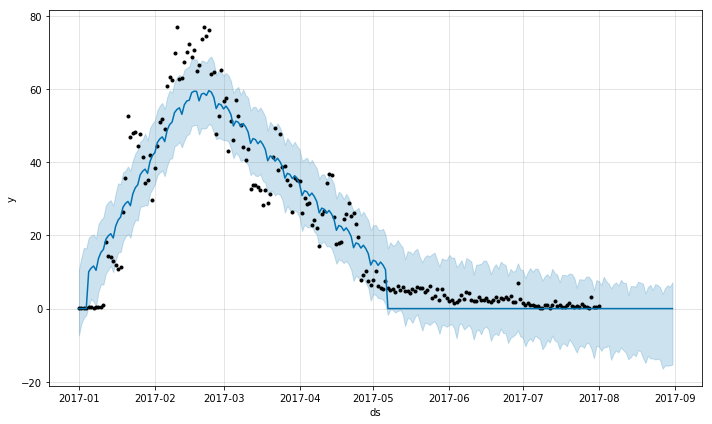

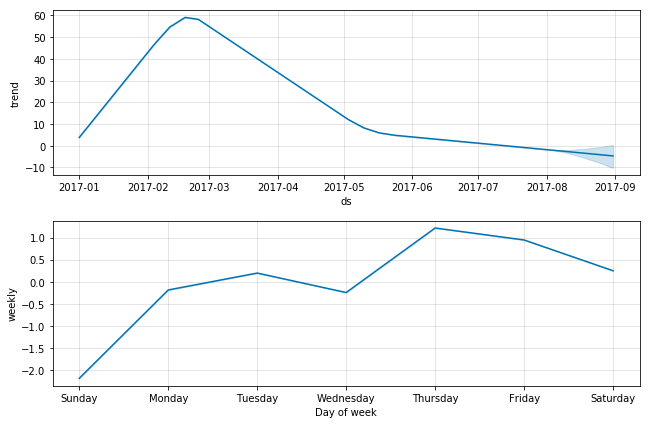

In [106]:
ts_train = ts[:"2017-08-01"]
ts_train = ts_train.reset_index()
ts_train.columns = ["ds", "y"]

(prophet_model, ts_predict) = make_prophet_prediction(ts_train, 30, withTransform=False)

prophet_model.plot(ts_predict)
prophet_model.plot_components(ts_predict)

ts_result = ts.to_frame().join(ts_predict.set_index("ds"), how="inner")

get_main_metrics(ts_result, ts_result, "2017-08-01", "2017-08-30", "col_value", "yhat")

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE = 0.24185099741581084
MAPE = 0.6202053687285976
Sum of data for the testing period: 16.85153 
Sum of predicted data for the testing period: 13.6201956704 


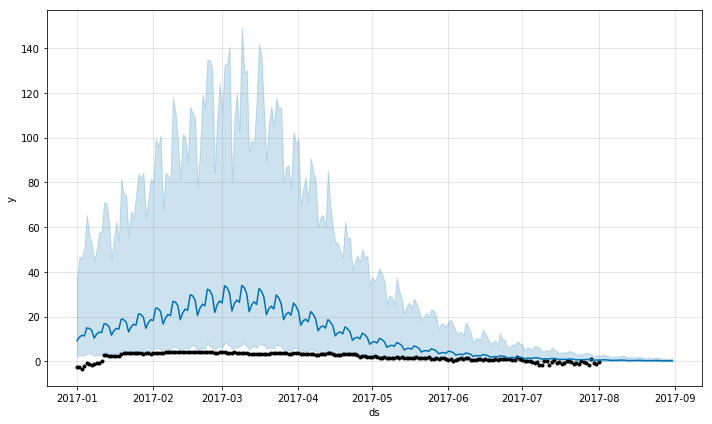

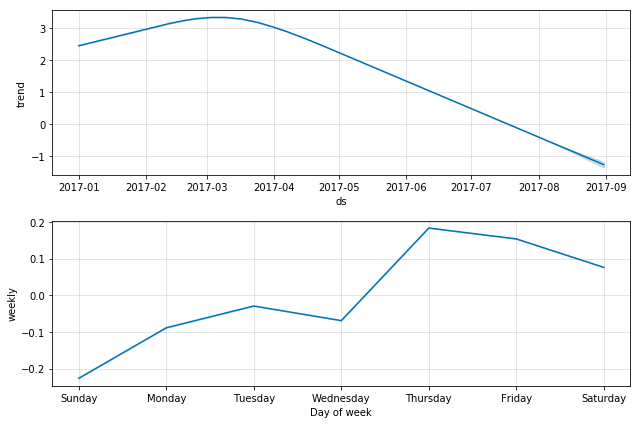

In [107]:
ts_train = ts[:"2017-08-01"]
ts_train = ts_train.reset_index()
ts_train.columns = ["ds", "y"]

(prophet_model, ts_predict) = make_prophet_prediction(ts_train, 30, withTransform=True)

prophet_model.plot(ts_predict)
prophet_model.plot_components(ts_predict)

ts_result = ts.to_frame().join(ts_predict.set_index("ds"), how="inner")

get_main_metrics(ts_result, ts_result, "2017-08-01", "2017-08-30", "col_value", "yhat")

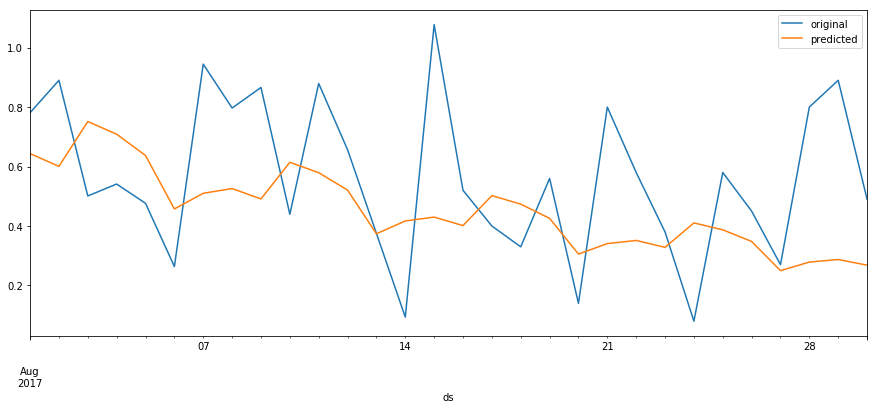

In [130]:
import matplotlib.pylab as plt
get_ipython().magic('matplotlib inline')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

ts_viz = ts_predict.set_index("ds")
#ts_viz["2017-08-01":"2017-10-01"]["yhat_upper"].plot()
#ts_viz["2017-08-01":"2017-10-01"]["yhat_lower"].plot()
df = ts["2017-08-01":"2017-08-30"].to_frame()
ts_viz = ts_viz["2017-08-01":"2017-08-30"]["yhat"].to_frame()

df.columns = ["original"]
df.index.names = ["ds"]
ts_viz.columns = ["predicted"]
df_result = df.join(ts_viz)
df_result.plot()


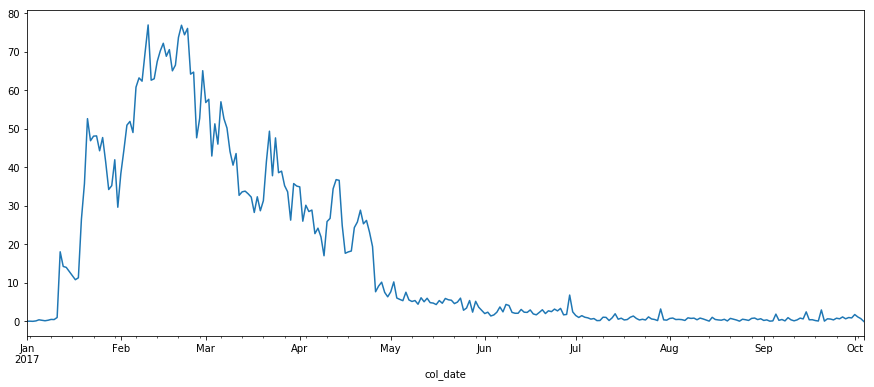

In [132]:
ts.plot()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


MAE = 12.398982213774953
MAPE = 33.91666573175419
Sum of data for the testing period: 16.85153 
Sum of predicted data for the testing period: -355.117936413 


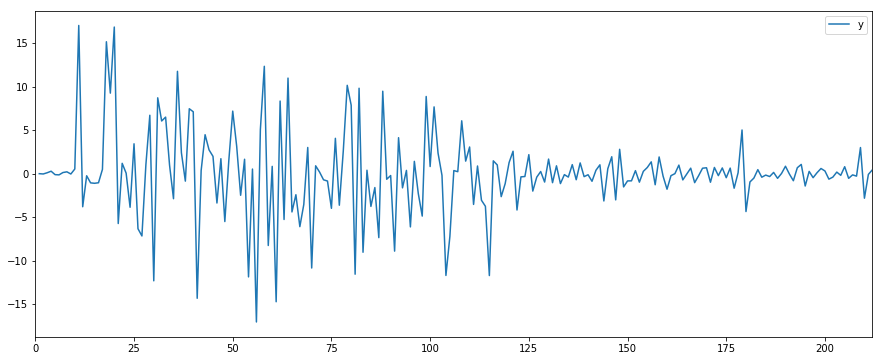

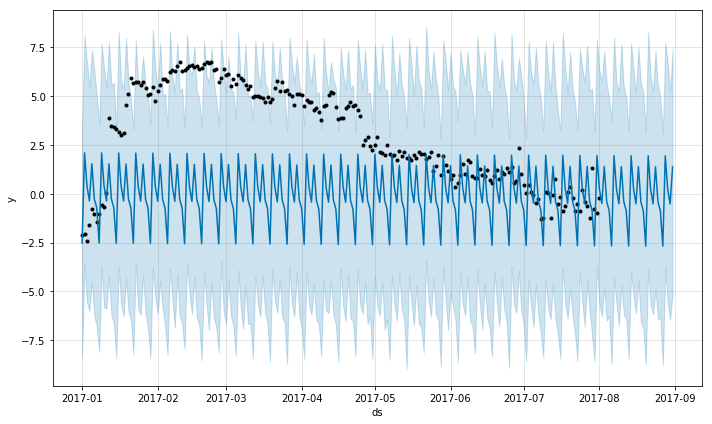

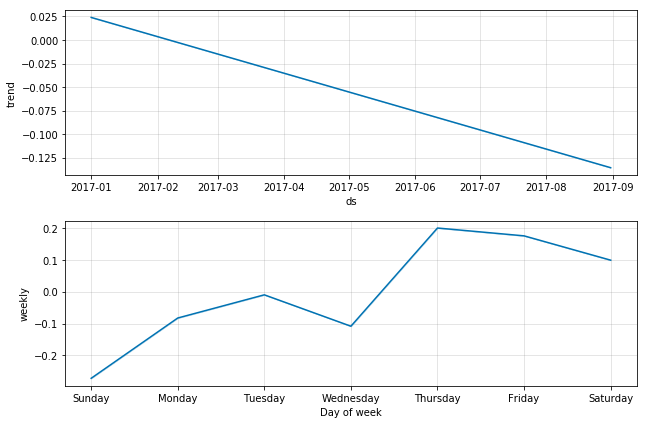

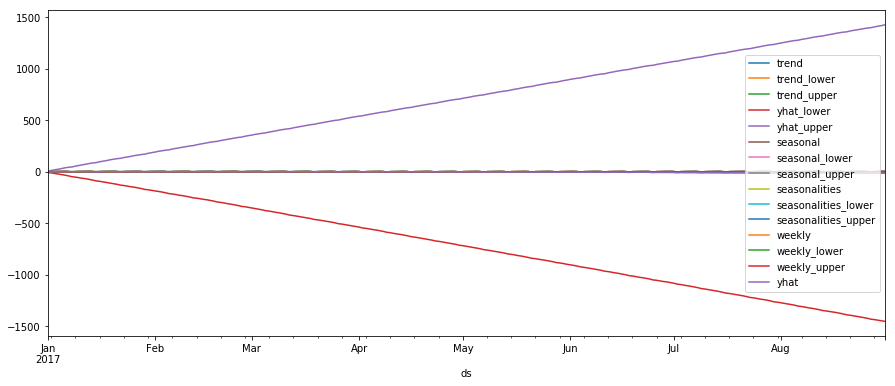

In [147]:
ts_train = ts[:"2017-08-01"]
ts_train_diff = ts_train - ts_train.shift()
ts_train_diff = ts_train_diff.reset_index()
ts_train_diff.columns = ["ds", "y"]
ts_train_diff.plot()

model_prophet = Prophet()
model_prophet.fit(ts_train_diff)
ts_predict = model_prophet.predict(model_prophet.make_future_dataframe(periods=30))

prophet_model.plot(ts_predict)
prophet_model.plot_components(ts_predict)

ts_predict = ts_predict.set_index("ds")
ts_predict = ts_predict.cumsum()
ts_predict.plot()

ts_result = ts.to_frame().join(ts_predict, how="inner")

get_main_metrics(ts_result, ts_result, "2017-08-01", "2017-08-30", "col_value", "yhat")

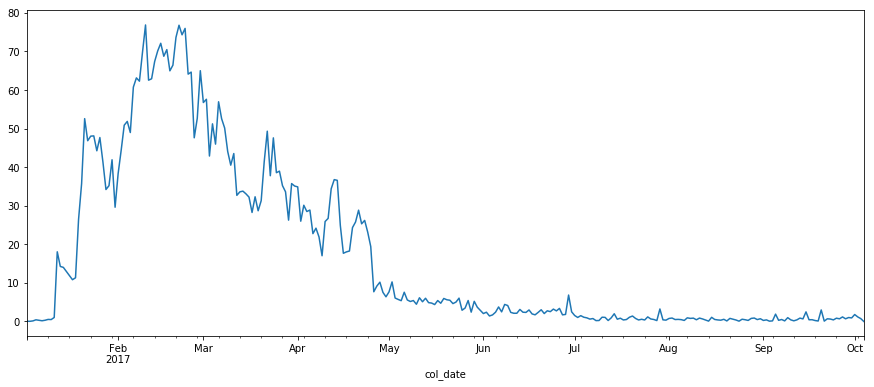

In [135]:
ts_orig = ts_diff.cumsum()
ts_orig.plot()

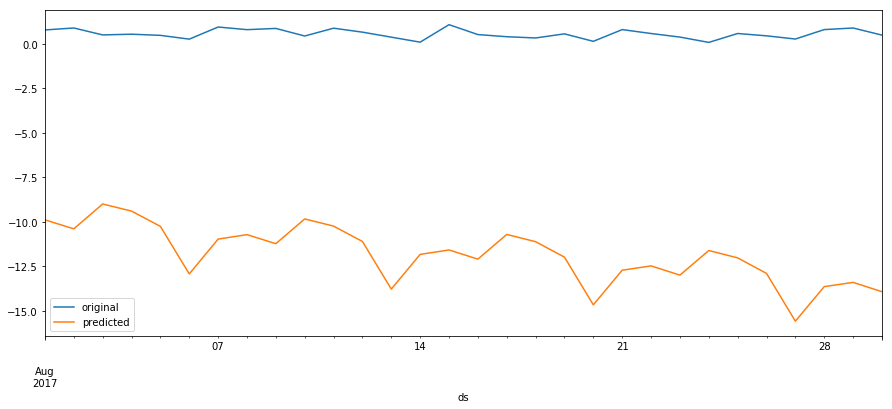

In [145]:
import matplotlib.pylab as plt
get_ipython().magic('matplotlib inline')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

ts_viz = ts_predict
#ts_viz["2017-08-01":"2017-10-01"]["yhat_upper"].plot()
#ts_viz["2017-08-01":"2017-10-01"]["yhat_lower"].plot()
df = ts["2017-08-01":"2017-08-30"].to_frame()
ts_viz = ts_viz["2017-08-01":"2017-08-30"]["yhat"].to_frame()

df.columns = ["original"]
df.index.names = ["ds"]
ts_viz.columns = ["predicted"]
df_result = df.join(ts_viz)
df_result.plot()